# Lab Assignment Two: Exploring Image Data

Arely Alcantara, Emily Fashenpour

## 1. Business Understanding

With the constant rise of technologies, and new personal recognition techniques - most corporations are leaning into using facial detection and recognition. Apple has incorporated face ID instead of touch ID, so that a user is clearly aware and willing to unlock their phone. Other companies are steering away from ID badges and instead are using face detection for building access, and other tasks that used to require ID swiping. However, the reliability and the accuracy of the facial recognition technologies is not perfect. For example, I (Emily) was able to use FaceID to unlock my twin sister's iPhone. Therefore, we believe that it is necessary that these machine learning and artificial intelligence models work appropriately and accurately as to avoid impersonation by others that sometimes lead to identity theft, privacy concerns, among others concerns.

The dataset we selected to analyze is made up of real and fake images - where real images are unedited, raw pictures of a human face, while the 'fake' images are edited or altered images of a human face with a different nose or different eye color, etc. Many of the altered images seem to have been edited to have smoother skin or changing the size of features. There is a total of 2,041 pictures in the entire dataset. We want to predict if an image is real or altered - as well as see how accurate the model is in detecting that. The dataset contains images of the real unedited person as well as the edited version of the image.

A third party that might be interested in this would be Instagram as spam accounts are usually created, and this model would help against that and only have original and 'verified' or real users.

We believe that in order for a third party to consider this useful, the prediction algorithm has to be very accurate, enough to be able to recognize minor edits to an image.

Dataset URL: https://www.kaggle.com/ciplab/real-and-fake-face-detection

Prediction task: Real or fake image of a human face? With what degree of accuracy can we say that?

## 2. Data Preparation

In [21]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os, sys
import cv2

real = os.listdir('real/')
fake = os.listdir('fake/')

print('Working with {0} images of real faces'.format(len(real)))
print('Working with {0} images of fake/edited faces'.format(len(fake)))
print('Working with a total of {0} faces'.format(len(real) + len(fake)))

images = []
labels = []

for image_path in real:
    img = cv2.imread('real/' + image_path, 0)
    img = cv2.resize(img, (250, 250))
    img_size = img.shape
    img = img.flatten()
    images.append(img)
    labels.append(0)
    
for image_path in fake:
    img = cv2.imread('fake/' + image_path, 0)
    img = cv2.resize(img, (250, 250))
    img = img.flatten()
    images.append(img)
    labels.append(1)
    
images = np.array(images)
labels = np.array(labels)
print('All images are 600 x 600 pixels and they are resized to 250 x 250. After linearizing each image, the image vector has dimensions of:')
print(img_size)
print('Combining all the 2041 vectorized images into one numpy array gives the following dimensions:')
images.shape

Working with 1081 images of real faces
Working with 960 images of fake/edited faces
Working with a total of 2041 faces
All images are 600 x 600 pixels and they are resized to 250 x 250. After linearizing each image, the image vector has dimensions of:
(250, 250)
Combining all the 2041 vectorized images into one numpy array gives the following dimensions:


(2041, 62500)

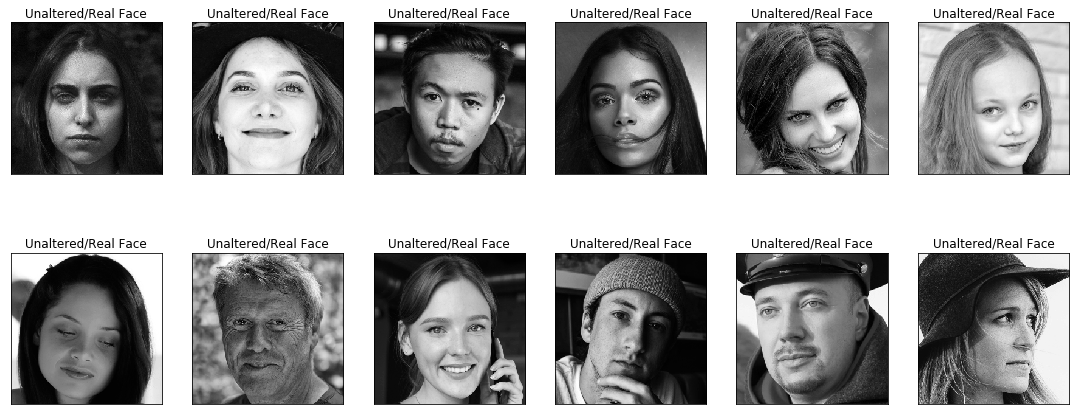

In [22]:
#show some real images of human faces
#from matplotlib import pyplot as plt

n_row=2
n_col=6
plt.figure(figsize=(2.5 * n_col, 3.1 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
real = 0
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[real].reshape((250, 250)), cmap=plt.cm.gray)
    real += 1
    plt.title("Unaltered/Real Face")
    plt.xticks(())
    plt.yticks(())

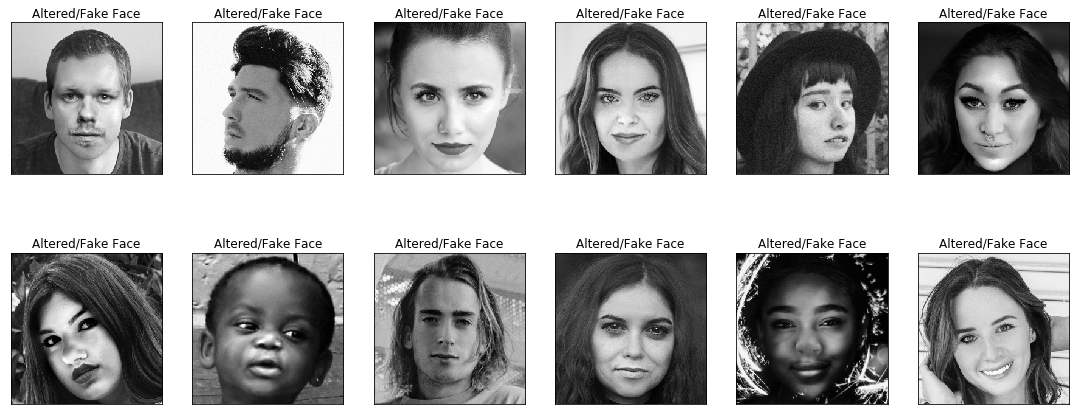

In [23]:
#show some fake images too        
n_row=2
n_col=6
plt.figure(figsize=(2.5 * n_col, 3.1 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
fake = 1500
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[fake].reshape((250, 250)), cmap=plt.cm.gray)
    fake += 1
    plt.title("Altered/Fake Face")
    plt.xticks(())
    plt.yticks(())

## 3. Data Reduction

### 3.1 Linear Dimensionality Reduction using PCA and Visualizing Explained Variance

In [24]:
#linear reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=250)
pca.fit(images.copy())
images_pca = pca.transform(images)

print('pca', pca.components_)

pca [[ 0.00602594  0.00605733  0.00605064 ...  0.00439332  0.00439426
   0.00439104]
 [ 0.0038695   0.00390341  0.00394531 ... -0.000756   -0.00076405
  -0.00074698]
 [-0.00341253 -0.00342718 -0.00350735 ...  0.00407524  0.00403306
   0.00394819]
 ...
 [-0.00274196 -0.00290429 -0.00312734 ... -0.00114589 -0.002135
  -0.00184168]
 [-0.00042054 -0.00065375 -0.00116887 ... -0.00264141 -0.00232961
  -0.00220287]
 [ 0.0003017  -0.00070563  0.00012915 ... -0.00283046 -0.00100037
   0.00279693]]


In [25]:
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
    
plot_explained_variance(pca)

From the plot above, we were able to conclude that we need at least 157 dimensions to represent 90% of the explained variance. By having a larger value for explained variance ratio, there is a higher association between the components and target values. We started by visualizing 2 principle components and increased the number of components until we reached about 250, from which we were able to see where we were able to represent 90% of the explained variance. This makes sense because we need at least 157 pixels to have a rough but somewhat clear idea of the image we are looking at. From here, we can start to see if the image is a real or altered (fake) face. 

We can conclude that we need approximately 160 pixels/principle components to adequately make a prediction on whether this is a real human face. There are other factors to consider of course, but in this case and from our analysis, we can see that 157 components makes the cut for what we need.

An entire image is originally composed of about 60,000 pixels so 160 pixels is a small fraction in comparison - however, by having this group of pixels, we can get an idea of the facial outline or other characteristics in a human face as opposed to having 160 random pixels.

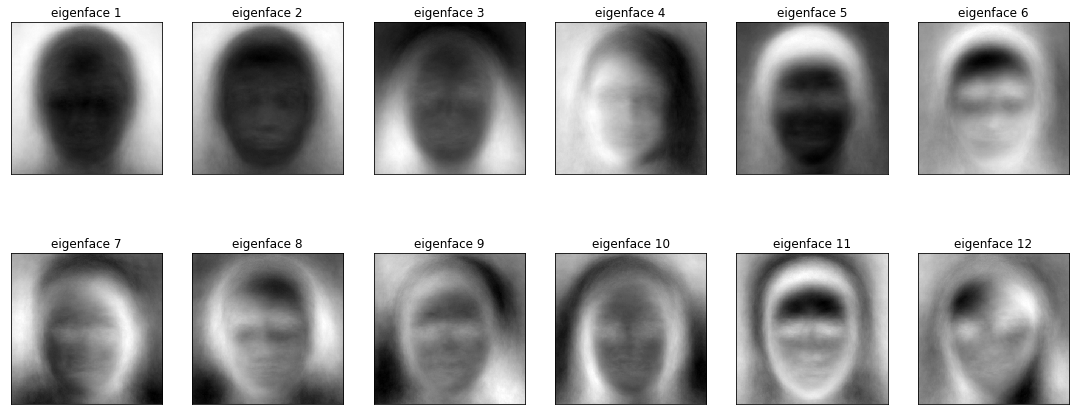

In [26]:
#reconstructing faces using PCA
eigenfaces = pca.components_.reshape((250,250, 250))

n_row=2
n_col=6
plt.figure(figsize=(2.5 * n_col, 3.1 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenfaces[i].reshape((250, 250)), cmap=plt.cm.gray)
    plt.title('eigenface %d' % int(i+1))
    plt.xticks(())
    plt.yticks(())

### 3.2 Linear Dimensionality Reduction using Randomized PCA

In [27]:
rpca = PCA(n_components=250,svd_solver='randomized')
rpca.fit(images.copy())
images_rpca = rpca.transform(images)

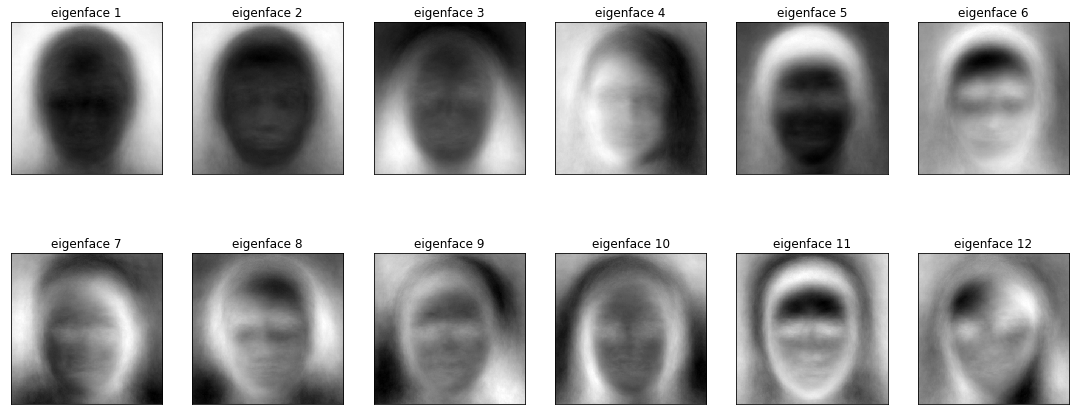

In [28]:
eigenfaces = rpca.components_.reshape((250,250, 250))

n_row=2
n_col=6
plt.figure(figsize=(2.5 * n_col, 3.1 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenfaces[i].reshape((250, 250)), cmap=plt.cm.gray)
    plt.title('eigenface %d' % int(i+1))
    plt.xticks(())
    plt.yticks(())

We implemented randomized PCA to see if it was any better/worse than full PCA - so we decided to visualize a couple of images to see it for ourselves. Referring back to the images drawn in the section above from full PCA, the results are very similar to each other - and we can agree that the models are very weak and we need to compare to kernel PCA to see if that model is any better.

### 3.3 Non-Linear Dimensionality Reduction using kPCA

In [29]:
%%time
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2000, kernel='rbf', fit_inverse_transform=False, gamma=4, remove_zero_eig=True)  
kpca.fit(images.copy())

CPU times: user 9.07 s, sys: 496 ms, total: 9.56 s
Wall time: 5.23 s


KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=False, gamma=4, kernel='rbf',
          kernel_params=None, max_iter=None, n_components=2000, n_jobs=None,
          random_state=None, remove_zero_eig=True, tol=0)

In [30]:
%%time
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2000, kernel='rbf', fit_inverse_transform=True, gamma=4, remove_zero_eig=True)  
kpca.fit(images.copy())

CPU times: user 23.6 s, sys: 779 ms, total: 24.4 s
Wall time: 13.5 s


KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=True, gamma=4, kernel='rbf', kernel_params=None,
          max_iter=None, n_components=2000, n_jobs=None, random_state=None,
          remove_zero_eig=True, tol=0)

some real images:


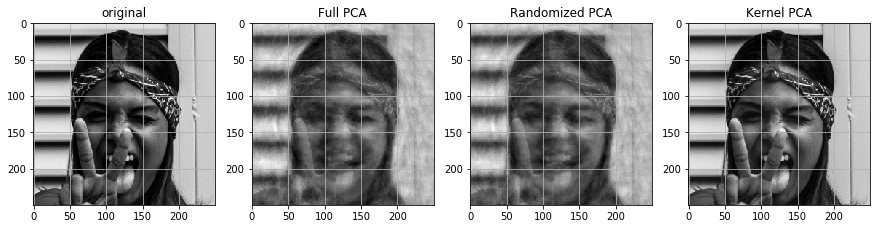

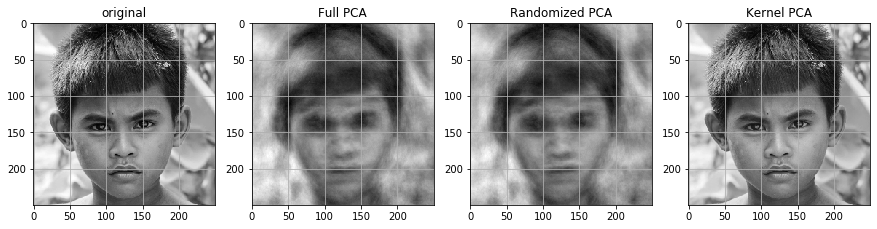

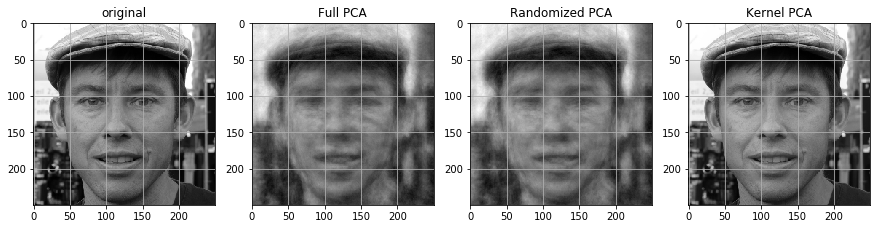

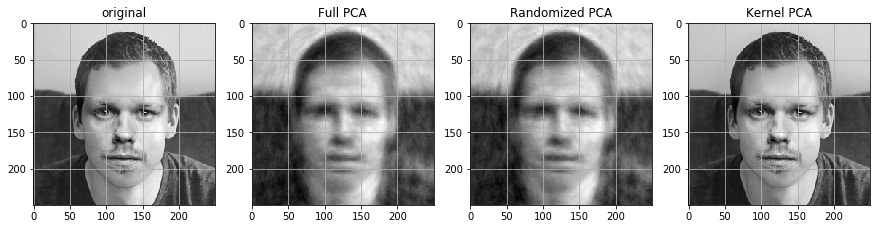

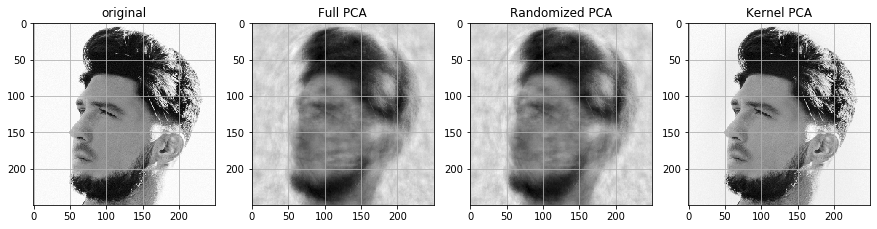

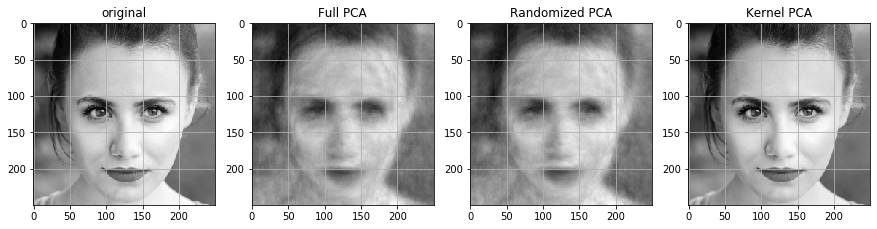

In [40]:
# widgets example
from ipywidgets import widgets  # make this interactive!

h = w = 250
def plt_reconstruct(idx_to_reconstruct):
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    
    reconstructed_image = pca.inverse_transform(pca.transform(images[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_rpca = rpca.inverse_transform(rpca.transform(images[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(images[idx_to_reconstruct].reshape(1, -1)))
    
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,4,1)
    plt.imshow(images[idx_to_reconstruct].reshape((h, w)), cmap=plt.cm.gray)
    plt.title('original')
    plt.grid()
    
    plt.subplot(1,4,2)
    plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Full PCA')
    plt.grid()
    
    plt.subplot(1,4,3)
    plt.imshow(reconstructed_image_rpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Randomized PCA')
    plt.grid()
    
    plt.subplot(1,4,4)
    plt.imshow(reconstructed_image_kpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Kernel PCA')
    plt.grid()

print('some real images:')
plt_reconstruct(500)
plt_reconstruct(501)
plt_reconstruct(502)
plt_reconstruct(1500)
plt_reconstruct(1501)
plt_reconstruct(1502)


We visualized some original images in comparison to the full PCA reconstruction, the randomized PCA reconstruction, and the kernel PCA reconstruction. From visual inspection, one can see that the kernel PCA is the best in recreating the original. These visuals help us get an idea of how these PCAs perform in relation to each other. Some of the kernel PCA images even look better than the original images! However, we know that visuals are not enough evidence to support the validity of each of these functions, so we decided to find numerical metrics by comparing the structural similarity of each image and reconstruction, as seen below.

In [106]:
from skimage.measure import compare_ssim
import warnings
import pandas as pd
import random
warnings.filterwarnings('ignore')

counter = 0
metrics = []
while counter < 20:
    rand_num = random.randint(0, 2041)
    diff_kpca = compare_ssim(images[rand_num], kpca.inverse_transform(kpca.transform(images[rand_num].reshape(1, -1)))[0].T)
    diff_pca = compare_ssim(images[rand_num], pca.inverse_transform(pca.transform(images[rand_num].reshape(1, -1)))[0].T)
    diff_rpca = compare_ssim(images[rand_num], rpca.inverse_transform(rpca.transform(images[rand_num].reshape(1, -1)))[0].T)
    temp = [diff_pca, diff_rpca, diff_kpca]
    metrics.append(temp)
    counter += 1
metrics = np.array(metrics)
df = pd.DataFrame(metrics,columns=['pca', 'random pca', 'kernel pca'])
df

pca  random pca  kernel pca
0   0.632431    0.634647    0.834364
1   0.635346    0.639638    0.817660
2   0.632426    0.631264    0.818610
3   0.616612    0.618103    0.826028
4   0.552573    0.553681    0.768124
5   0.644925    0.638534    0.838137
6   0.501527    0.493503    0.774364
7   0.618409    0.625625    0.816788
8   0.604335    0.606004    0.848096
9   0.620267    0.616969    0.799813
10  0.628944    0.632701    0.828328
11  0.573104    0.569323    0.801351
12  0.617061    0.615333    0.846967
13  0.627108    0.622730    0.817586
14  0.583179    0.586980    0.822815
15  0.612946    0.613777    0.802450
16  0.500567    0.497408    0.770451
17  0.594707    0.589464    0.822376
18  0.553895    0.539956    0.782079
19  0.687929    0.691090    0.874169

Structural similarity is a measure of how similar 2 images are, so a higher number just means that the pictures are the most similar. We found the structural similarity for 20 random images and calculated values between the original image and PCA, random PCA, and kernel PCA, respectively. PCA and random PCA overall seem to have similar values differing by .01 at the most, but both values are around .5 and .6 meaning a poor similarity. Kernel PCA on the other hand has values ranging from .77 to .84 (meaning approximately 80% similarity) - much better than the others and indicating that there is a stronger similarity to the original image. We can conclude that kernel PCA can reconstruct an image with the most similarity. We prefer this one over the others as this method allows for the most closest, and similar image reconstruction to the original image. 

### 3.4 Feature Extraction using the Gradient

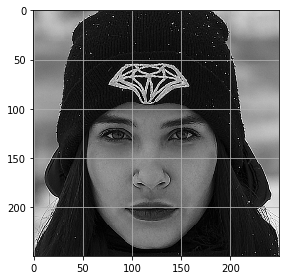

In [110]:
from skimage.io import imshow
from skimage.filters import sobel_h, sobel_v

rand_index = int(np.random.rand(1)*len(images))
img  = images[rand_index].reshape((250,250))
imshow(img)
plt.grid()

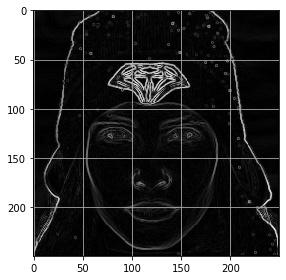

In [111]:
gradient_mag = np.sqrt(sobel_v(img)**2 + sobel_h(img)**2 ) 
imshow(gradient_mag)
plt.grid()

In [112]:
def comp_gradient(row,shape):
    gradient_mag = np.sqrt(sobel_v(row.reshape(shape))**2 + sobel_h(row.reshape(shape))**2 ) 
    return gradient_mag.reshape((-1))

grad_features = np.apply_along_axis(comp_gradient, 1, images, (250,250))
print(grad_features.shape)

(2041, 62500)


In [113]:
from sklearn.metrics.pairwise import pairwise_distances
dist_matrix_grad = pairwise_distances(grad_features)

1042
1646


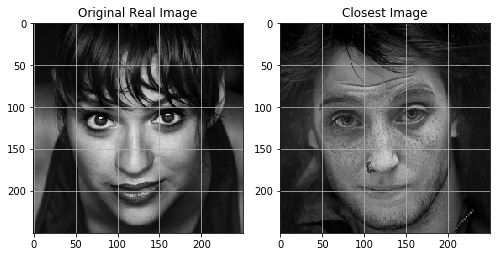

In [138]:
import copy

#finding closets image to random real image and fake image
real_ind1 = np.random.randint(0, 1081)

dist_real_grad = copy.deepcopy(dist_matrix_grad[real_ind1,:])
dist_real_grad[real_ind1] = np.infty
real_ind2 = np.argmin(dist_real_grad)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(images[real_ind1].reshape((250,250)))
plt.title("Original Real Image")
plt.grid()

plt.subplot(1,2,2)
imshow(images[real_ind2].reshape((250,250)))
plt.title("Closest Image")
plt.grid()

print(real_ind1)
print(real_ind2)

1957
881


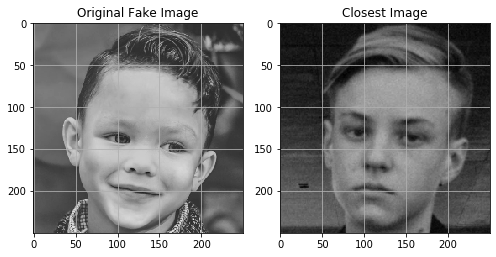

In [140]:
fake_ind1 = np.random.randint(1081, 2041)

dist_fake_grad = copy.deepcopy(dist_matrix_grad[fake_ind1,:])
dist_fake_grad[fake_ind1] = np.infty
fake_ind2 = np.argmin(dist_fake_grad)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(images[fake_ind1].reshape((250,250)))
plt.title("Original Fake Image")
plt.grid()

plt.subplot(1,2,2)
imshow(images[fake_ind2].reshape((250,250)))
plt.title("Closest Image")
plt.grid()

print(fake_ind1)
print(fake_ind2)

From using the gradient approach, we visualized 2 different pairs of images as seen above. The gradient finds structure and edges in an image, so when trying to find an image that is most similar to the original, it would make sense that the 2 images would have similar facial orientation and positioning in the images as whole. One can see that both sets of images are structurally similar and have similar shades/color as well as positioning making them close/related to each other. We feel that this approach/method can be improved because it might not be as useful for determining if an person's feature has been made smaller or larger, so we also implemented Daisy feature extraction to see how it performed in relation to the gradient approach.

### 3.5 Feature Extraction using Daisy

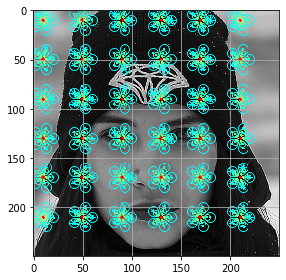

In [141]:
from skimage.feature import daisy

features, img_desc = daisy(img, step=40, radius=10, rings=3, histograms=5, orientations=8, visualize=True)
imshow(img_desc)
plt.grid()

In [142]:
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape),step=10, radius=10, rings=2, histograms=6, orientations=8, visualize=False)
    return feat.reshape((-1))

daisy_features = np.apply_along_axis(apply_daisy, 1, images, (250,250))

In [143]:
from sklearn.metrics.pairwise import pairwise_distances
dist_matrix = pairwise_distances(daisy_features)

239
1340


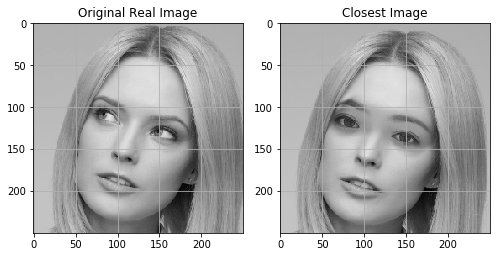

In [147]:
import copy

#finding closets image to random real image and fake image
real_ind1 = np.random.randint(0, 1081)

dist_real = copy.deepcopy(dist_matrix[real_ind1,:])
dist_real[real_ind1] = np.infty
real_ind2 = np.argmin(dist_real)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(images[real_ind1].reshape((250,250)))
plt.title("Original Real Image")
plt.grid()

plt.subplot(1,2,2)
imshow(images[real_ind2].reshape((250,250)))
plt.title("Closest Image")
plt.grid()

print(real_ind1)
print(real_ind2)

2028
612


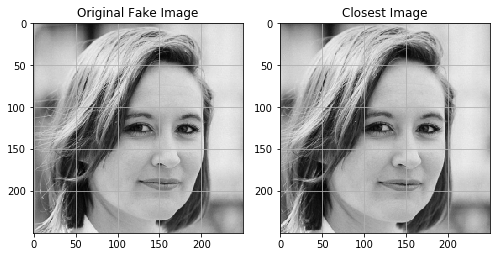

In [148]:
fake_ind1 = np.random.randint(1081, 2041)

dist_fake = copy.deepcopy(dist_matrix[fake_ind1,:])
dist_fake[fake_ind1] = np.infty
fake_ind2 = np.argmin(dist_fake)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(images[fake_ind1].reshape((250,250)))
plt.title("Original Fake Image")
plt.grid()

plt.subplot(1,2,2)
imshow(images[fake_ind2].reshape((250,250)))
plt.title("Closest Image")
plt.grid()

print(fake_ind1)
print(fake_ind2)

As noted earlier, the dataset contains the real image and the edited/fake version of the image. This can be clearly seen in the first image set where the lady's eyes and eyebrows were replaced by another overlayed image/edit. This Daisy method really picked the 2 closest images - those being the original and edited version of the same human face. This is an improvement from the gradient approach from before. We feel that this method could be extremely useful for Instagram in regards of checking for spam accounts or people trying to impersonate other celebrities or others in general. This method is able to accurately select images that contain edits on them, but that the face already exists in another image.

### 3.6 Feature Extraction using Gabor Kernels

In [149]:
from skimage.filters import gabor_kernel
from scipy import ndimage as ndi
from scipy import stats

# prepare filter bank kernels
kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta=theta, sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)
            
# compute the filter bank and take statistics of image
def compute_gabor(row, kernels, shape):
    feats = np.zeros((len(kernels), 4), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = ndi.convolve(row.reshape(shape), kernel, mode='wrap')
        _,_,feats[k,0],feats[k,1],feats[k,2],feats[k,3] = stats.describe(filtered.reshape(-1))      
    return feats.reshape(-1)

In [150]:
gabor_stats = np.apply_along_axis(compute_gabor, 1, images, kernels, (250,250))
print(gabor_stats.shape)

(2041, 64)


In [151]:
dist_matrix_gabor = pairwise_distances(gabor_stats)

684
1562


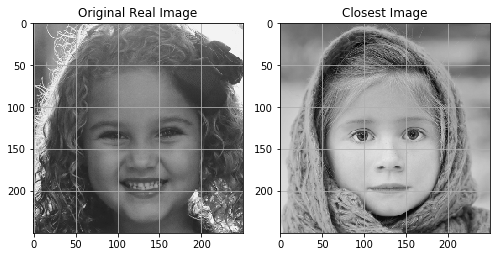

In [161]:
real_ind1 = np.random.randint(0, 1081)

dist_real_gab = copy.deepcopy(dist_matrix_gabor[real_ind1,:])
dist_real_gab[real_ind1] = np.infty
real_ind2 = np.argmin(dist_real_gab)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(images[real_ind1].reshape((250,250)))
plt.title("Original Real Image")
plt.grid()

plt.subplot(1,2,2)
imshow(images[real_ind2].reshape((250,250)))
plt.title("Closest Image")
plt.grid()

print(real_ind1)
print(real_ind2)

1591
1067


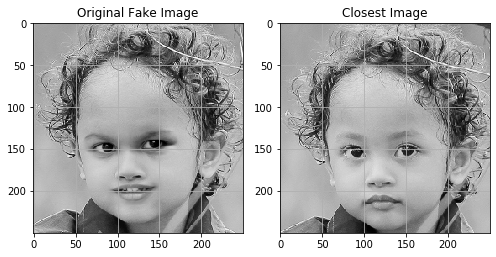

In [170]:
fake_ind1 = np.random.randint(1081, 2041)

dist_fake_gab = copy.deepcopy(dist_matrix_gabor[fake_ind1,:])
dist_fake_gab[fake_ind1] = np.infty
fake_ind2 = np.argmin(dist_fake_gab)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(images[fake_ind1].reshape((250,250)))
plt.title("Original Fake Image")
plt.grid()

plt.subplot(1,2,2)
imshow(images[fake_ind2].reshape((250,250)))
plt.title("Closest Image")
plt.grid()

print(fake_ind1)
print(fake_ind2)

We decided to use the Gabor method as well to see if there was any improvement in finding 2 similar images since gabor feature extraction works well with the changing textures in images. We noticed that this method looks for similar textures and shapes, and doesn't focus too much on the details such as the facial features on a human face. This can be supported as the first image set is 2 different girls, but their overall facial shape is similar making Gabor think they're the closest. The second set is indeed the same boy where the fake image is another completely different face - but Gabor picked out the outline and hair of the boy's face making them the closest images. Below, we provide some last thoughts as well as which method we liked better and which performed the best overall.

## 4. Additional Analysis

We didn't feel like one feature extraction technique was enough to accurately predict the 2 closest images, so we went a little crazy and did 3 techniques to compare the 3 and select the best out of them. For each of these approaches, we ran them each a couple of times and stopped at good depictions to show how they perform. So, for the Gradient approach, this one did not take a lot of time to run, but overall it only searched for similar shape and colors, not so much inclined on details like facial features. We rate that a 3 out of 5 stars as it could be better. Next up, we did Daisy and this one took relatively longer to run, but the results were spectacular. Every time we ran this one, we got 2 images of the same face where the fake had some sort of edit on it. We would rate it 4.5 out of 5 stars (because it caused our computers to overheat, but I guess it's ok since we got what we wanted). The Gabor Kernals approach took by far the longest time, and it performed decently as it identified the similar head shapes even though there were 2 different people. We rate this one 3.5 out of 5 stars because it is not very accurate with faces. Daisy is our winner - we feel that this approach is the most useful in comparing not only face shape and texture, but also facial features and identifying clear differences between the original image.

Circling back to our lovely third party (Instagram), we believe that the Daisy approach would be the most useful to them as this approach could greatly prevent people from 'catfishing' others in other words - pretending to be someone else. That way only one account could exist for one person and only unique accounts would exist online. If anyone tried to create and impersonate someone else, their account could be reported and they could potentially be accused of identity theft. And even if instagram doesn't need this feature, other companies could also make use of this. We feel that our Daisy model can definitely be improved, but as it stands now, it can definitely find 2 images of the same human face where one is edited.

## References

FaceFirst. "21 Amazing Uses for Face Recognition - Facial Recognition Use Cases". https://www.facefirst.com/blog/amazing-uses-for-face-recognition-facial-recognition-use-cases/

Kaggle dataset: https://www.kaggle.com/ciplab/real-and-fake-face-detection
